<a href="https://colab.research.google.com/github/mnilsson8/DSPS_mNilsson/blob/main/HW3/MBoltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [3]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Number of molecules')

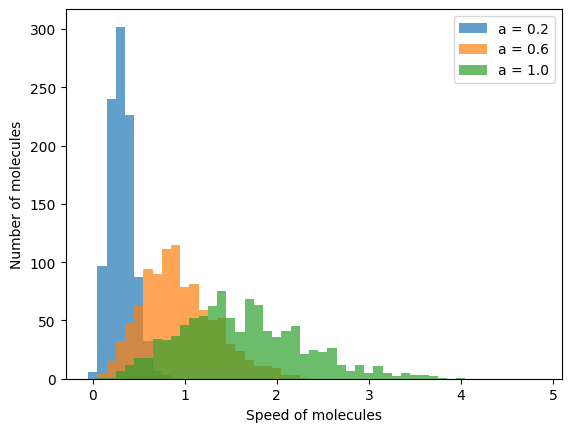

In [4]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);
pl.legend();

# your code to add labels here
pl.xlabel("Speed of molecules")
pl.ylabel("Number of molecules")

**Figure 1:** This plot shows the distribution of the speed of molecules in a gas for different temperatures that correspond to *a*. When *a* is the lowest, the distribution of the speeds has the smallest range and greatest average. This means that as *a* increases, the molecules have a greater range of speeds and a lower average speed.

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


The dependency is on the inverse root of the temperature. As the temperature of a gas increases, the average speed of the molecules increases. As shown in Figure 1, the inverse relationship is true for *a*, as when *a* decreases, the average speed of the molecules increases, so *a* must be proportional to the *inverse* root of the temperature.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

In [6]:
# your code here
k = 3 #degrees of freedom
mean_chi = np.sqrt(2)*sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)
for a in [0.2, 0.6, 1.0]:
    print(f"Mean of Chi distribution for a = {a}: {a*mean_chi}")
    print(f"Mean of empirical Chi distribution for a = {a}: {np.mean(sp.stats.chi.rvs(df=3, scale=a, size=1000))}\n")

Mean of Chi distribution for a = 0.2: 0.31915382432114625
Mean of empirical Chi distribution for a = 0.2: 0.3145811314276004

Mean of Chi distribution for a = 0.6: 0.9574614729634385
Mean of empirical Chi distribution for a = 0.6: 0.9493634528530505

Mean of Chi distribution for a = 1.0: 1.595769121605731
Mean of empirical Chi distribution for a = 1.0: 1.6145673705853096



The means are close to the empirical means, with a diferrence of less than one tenth, so the mean is very close to the most probable molecular speed. This does look right based on the distributions in Figure 1, because the means seem to be about where the center of the distributions are.

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here